<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/Data_Manipulation_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clone Business Analytics Repository**

In [45]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Libraries**

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

### **Read In the Dataset**

In [47]:
df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')

<ipython-input-47-3a3a8047f5cf>:1: DtypeWarning: Columns (34,36,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/business-analytics/datasets/massachusetts_mortgages_2017.zip')


### **Visualize the Dataset**

In [48]:
df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,41-1795868,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,350,Preapproval was not requested,2,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Plymouth County,23.0,5117.01,Not Hispanic or Latino,2,Hispanic or Latino,1,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,Male,1,64.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4444.0,40.590000,94300.0,83.470001,1435.0,1724.0,NaN
1,2017,0000026336,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,550,Preapproval was not requested,2,Loan originated,1,"Cambridge, Newton, Framingham - MA",15764.0,Massachusetts,MA,25,Middlesex County,17.0,3746.00,Hispanic or Latino,1,Not Hispanic or Latino,2,American Indian or Alaska Native,1,White,5.0,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,179.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4755.0,27.440001,104800.0,133.389999,1352.0,1949.0,NaN
2,2017,0000024224,Office of the Comptroller of the Currency,OCC,1,VA-guaranteed,3,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,630,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7614.00,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,NaN,Other type of purchaser,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6567.0,20.820000,84000.0,172.990005,1711.0,1883.0,NaN
3,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,298,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7502.00,"Information not provided by applicant in mail,...",3,No co-applicant,5,"I

### **Value Counts With Continuous Variables**

In [49]:
df['applicant_income_000s'].value_counts(bins=5)

,count
"(-8.998999999999999, 2000.6]",127208
"(2000.6, 4000.2]",85
"(4000.2, 5999.8]",14
"(5999.8, 7999.4]",4
"(7999.4, 9999.0]",2


In [50]:
df['applicant_income_000s'].value_counts(bins=[0, 50, 100, 500, 1000, 10000])

,count
"(100.0, 500.0]",61905
"(50.0, 100.0]",50800
"(-0.001, 50.0]",12856
"(500.0, 1000.0]",1322
"(1000.0, 10000.0]",430


### **Bar Plot**

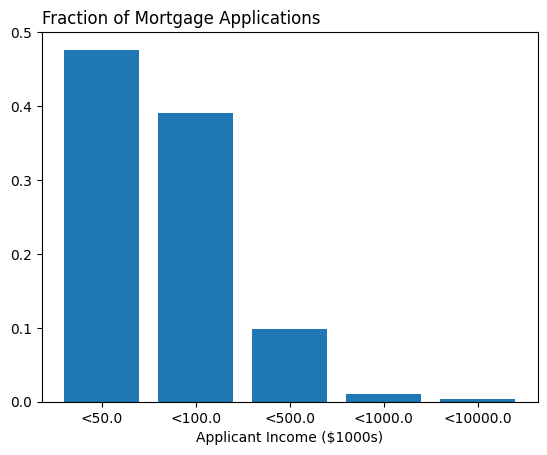

In [57]:
new_df = df['applicant_income_000s'].value_counts(normalize=True,
                                                  bins=[0, 50, 100, 500, 1000, 10000])
new_df.index = new_df.index.map(lambda x: x.right).sort_values()
plt.bar('<' + new_df.index.astype(str) , new_df.values)
plt.title('Fraction of Mortgage Applications', loc='left')
plt.xlabel('Applicant Income ($1000s)')
plt.show()

In [58]:
new_df.index

Index([50.0, 100.0, 500.0, 1000.0, 10000.0], dtype='float64')

### **Boolean Series**

In [ ]:
df['loan_type_name'] == 'Conventional'

,loan_type_name
0,False
1,True
2,False
3,True
4,True
...,...
129886,True
129887,True
129888,False
129889,False


In [ ]:
(df['loan_type_name'] == 'Conventional') & (df['loan_purpose_name'] == 'Home purchase')

,0
0,False
1,True
2,False
3,False
4,False
...,...
129886,True
129887,False
129888,False
129889,False


In [ ]:
~(df['loan_type_name'] == 'Conventional') | (df['loan_purpose_name'] == 'Home purchase')

,0
0,True
1,True
2,True
3,False
4,False
...,...
129886,True
129887,False
129888,True
129889,True


### **Index With Boolean**

In [ ]:
new_df = df[df['loan_type_name'] == 'Conventional']
new_df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
1,2017,0000026336,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,550,Preapproval was not requested,2,Loan originated,1,"Cambridge, Newton, Framingham - MA",15764.0,Massachusetts,MA,25,Middlesex County,17.0,3746.0,Hispanic or Latino,1,Not Hispanic or Latino,2,American Indian or Alaska Native,1,White,5.0,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,179.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4755.0,27.440001,104800.0,133.389999,1352.0,1949.0,NaN
3,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,298,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7502.0,"Information not provided by applicant in mail,...",3,No co-applicant,5,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,No co-applicant,5,130.0,Freddie Mac (FHLMC),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,7411.0,6.980000,84000.0,133.179993,2226.0,2679.0,NaN
4,2017,04-3243815,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,680,Not applicable,3,Loan originated,1,"Worcester - MA, CT",49340.0,Massachusetts,MA,25,Worcester County,27.0,7614.0,Hispanic or Latino,1,Hispanic or Latino,1,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,196.0,"Life insurance company, credit union, mortgage...",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,6567.0,20.820000,84000.0,172.990005,1711.0,1883.0,NaN
5,2017,06-1297784,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,417,Not applicable,3,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Plymouth County,23.0,5306.0,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"I

In [ ]:
df.loc[df['loan_type_name'] == 'Conventional', 'property_type_name']

,property_type_name
1,One-to-four family dwelling (other than manufa...
3,One-to-four family dwelling (other than manufa...
4,One-to-four family dwelling (other than manufa...
5,One-to-four family dwelling (other than manufa...
6,One-to-four family dwelling (other than manufa...
...,...
129884,One-to-four family dwelling (other than manufa...
129885,One-to-four family dwelling (other than manufa...
129886,One-to-four family dwelling (other than manufa...
129887,One-to-four family dwelling (other than manufa...


### **Sorting**

In [ ]:
df.sort_values(by='loan_amount_000s').head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
90917,2017,0000018181,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,2,Owner-occupied as a principal dwelling,1,2,Not applicable,3,Loan originated,1,Springfield - MA,44140.0,Massachusetts,MA,25,Hampden County,13.0,8137.01,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,86.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,2.16,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,3476.0,3.190000,66600.0,125.690002,1021.0,1370.0,NaN
94524,2017,0000018181,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,2,Owner-occupied as a principal dwelling,1,2,Not applicable,3,Loan originated,1,NaN,NaN,Massachusetts,MA,25,Franklin County,11.0,404.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,36.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,2.43,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,3483.0,6.600000,80000.0,92.629997,1225.0,1664.0,NaN
97742,2017,0000018181,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,2,Owner-occupied as a principal dwelling,1,3,Not applicable,3,Loan originated,1,Springfield - MA,44140.0,Massachusetts,MA,25,Hampshire County,15.0,8217.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,65.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,3691.0,12.140000,66600.0,134.600006,995.0,1301.0,NaN
13022,2017,0000018181,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,2,Owner-occupied as a principal dwelling,1,4,Not applicable,3,Loan originated,1,Springfield - MA,44140.0,Massachusetts,MA,25,Hampshire County,15.0,8224.02,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,"Informat

In [ ]:
df.sort_values(by='loan_amount_000s', ascending=False)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
5189,2017,0000090211,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,8000,Not applicable,3,Loan originated,1,"Cambridge, Newton, Framingham - MA",15764.0,Massachusetts,MA,25,Middlesex County,17.0,3531.01,"Information not provided by applicant in mail,...",3,Not applicable,4,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,Not applicable,4,NaN,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,2525.0,45.980000,104800.0,72.970001,124.0,348.0,NaN
33515,2017,0002489805,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,8000,Not applicable,3,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Suffolk County,25.0,108.02,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,4661.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,2849.0,19.020000,94300.0,184.740005,753.0,361.0,NaN
33611,2017,0000480228,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,7300,Not applicable,3,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Suffolk County,25.0,107.02,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,3212.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,2446.0,13.610000,94300.0,185.360001,599.0,348.0,NaN
31742,2017,0004114567,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,2,Owner-occupied as a principal dwelling,1,7085,Not applicable,3,Loan originated,1,Boston - MA,14454.0,Massachusetts,MA,25,Suffolk County,25.0,201.01,Not Hispanic or Latino,2,Not Hispanic or Latino,2,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,1963.0,Loan was not originated or was not sold in cal...,0,NaN,

### **Groupby**

In [ ]:
df.groupby('loan_type_name')['loan_amount_000s'].mean()

,loan_amount_000s
loan_type_name,
Conventional,348.566388
FHA-insured,289.370604
FSA/RHS-guaranteed,218.478488
VA-guaranteed,319.351628


In [ ]:
df.groupby('loan_type_name')['loan_amount_000s'].agg(['mean', 'median'])

,mean,median
loan_type_name,,
Conventional,348.566388,297.0
FHA-insured,289.370604,274.0
FSA/RHS-guaranteed,218.478488,211.0
VA-guaranteed,319.351628,300.0


### **Temporary Functions**

In [ ]:
(lambda x: x**2)(2.)

4.0

### **Transform**

In [ ]:
df['normalized_loan_amount'] = df.groupby('loan_type_name')['loan_amount_000s'].transform(lambda x: (x - x.mean()) / x.std())